In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as clu
from kneed import KneeLocator

In [2]:
df = pd.read_csv('shop1.csv')

In [3]:
df.head()

,Unnamed: 0,Gender,Age,income,score
0,0,1,19,15,39
1,1,1,21,15,81
2,2,0,20,16,6
3,3,0,23,16,77
4,4,0,31,17,40


In [4]:
df.drop('Unnamed: 0', axis ='columns', inplace = True)

In [5]:
df.head()

,Gender,Age,income,score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


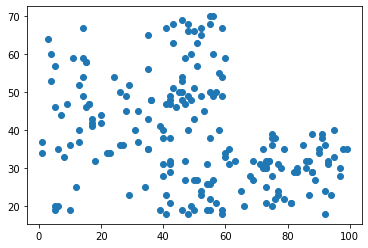

In [6]:
plt.scatter(df['score'], df['Age'])

# Score and Age Cluster

In [7]:
wcss = []
cluster = range(1,15)
for k in cluster:
    kmean = clu.KMeans(n_clusters = k)
    kmean.fit(df[['score', 'Age']])
    wcss.append(kmean.inertia_)
    


C:\Users\ziyed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [8]:
kmean

KMeans(n_clusters=14)

In [9]:
wcss

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23830.960393772897,
 19489.64388446867,
 15514.193134351035,
 13012.800984809695,
 11537.692632709479,
 10168.277083982011,
 9360.316986461252,
 8655.057421271538,
 7970.220539750814,
 7226.201452211359]

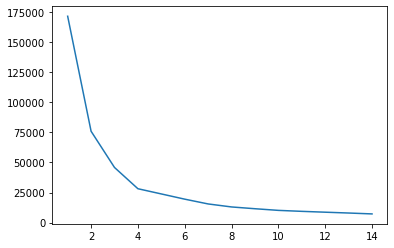

In [10]:
plt.plot(cluster,wcss)

In [11]:
kn = KneeLocator(cluster,wcss, curve = 'convex', direction = 'decreasing')

In [12]:
print('Optimal number of cluster',kn.knee)

Optimal number of cluster 4


In [13]:
kmean1 = clu.KMeans(n_clusters = 3)

In [14]:
df['cluster'] = kmean1.fit_predict(df[['score', 'Age']])

In [15]:
df.head(10)

,Gender,Age,income,score,cluster
0,1,19,15,39,0
1,1,21,15,81,1
2,0,20,16,6,2
3,0,23,16,77,1
4,0,31,17,40,0
5,0,22,17,76,1
6,0,35,18,6,2
7,0,23,18,94,1
8,1,64,19,3,2
9,0,30,19,72,1


In [16]:
center = kmean1.cluster_centers_
center

array([[47.78021978, 43.05494505],
       [80.74193548, 29.56451613],
       [14.59574468, 42.95744681]])

In [17]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

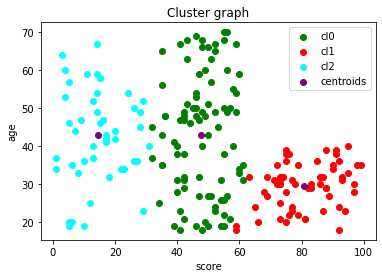

In [18]:
plt.title('Cluster graph')
plt.xlabel('score')
plt.ylabel('age')
plt.scatter(df0['score'], df0['Age'], color = 'green', label = 'cl0')
plt.scatter(df1['score'], df1['Age'], color = 'red', label = 'cl1')
plt.scatter(df2['score'], df2['Age'], color = 'cyan', label = 'cl2')
plt.scatter(center[:,0], center[:,1],color = 'purple', label = 'centroids')
plt.legend()

# Gender and income

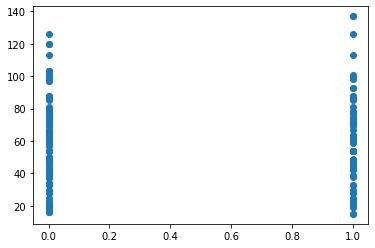

In [19]:
plt.scatter(df['Gender'], df['income'])

In [20]:
wcss1 = []
cluster1 = range(1,10)
for k1 in cluster1:
    kmean3 = clu.KMeans(n_clusters = k1)
    kmean3.fit(df[['Gender','income']])
    wcss1.append(kmean3.inertia_)

C:\Users\ziyed\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [21]:
wcss1

[137326.56,
 48709.90707070708,
 23577.19987922706,
 13326.534231499052,
 8529.812619047618,
 5099.71130952381,
 3979.589285714286,
 2904.341804029303,
 2223.5412698412697]

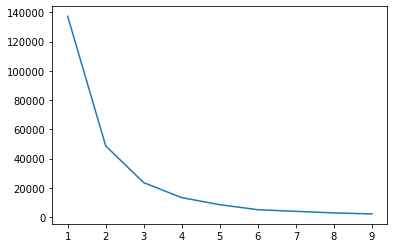

In [22]:
plt.plot(cluster1,wcss1)

In [23]:
kn1 = KneeLocator(cluster1,wcss1, curve = 'convex', direction = 'decreasing')

In [24]:
print('Optimal number of cluster',kn1.knee)

Optimal number of cluster 3


In [25]:
kmean4 = clu.KMeans(n_clusters = 2)

In [26]:
df['cluster_GI'] = kmean4.fit_predict(df[['Gender', 'income']])

In [27]:
center1 = kmean4.cluster_centers_
center1

array([[ 0.47272727, 79.6       ],
       [ 0.4       , 37.28888889]])

In [28]:
df0 = df[df.cluster_GI == 0]
df1 = df[df.cluster_GI == 1]
df2 = df[df.cluster_GI == 2]

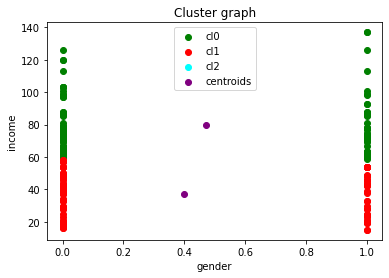

In [29]:
plt.title('Cluster graph')
plt.xlabel('gender')
plt.ylabel('income')
plt.scatter(df0['Gender'], df0['income'], color = 'green', label = 'cl0')
plt.scatter(df1['Gender'], df1['income'], color = 'red', label = 'cl1')
plt.scatter(df2['Gender'], df2['income'], color = 'cyan', label = 'cl2')
plt.scatter(center1[:,0], center1[:,1],color = 'purple', label = 'centroids')
plt.legend()

# Income and Age cluster 

In [30]:
kmean5 = clu.KMeans(n_clusters = 4)

In [31]:
df['cluster_IA'] = kmean5.fit_predict(df[['income','Age']])

In [35]:
df.head()

,Gender,Age,income,score,cluster,cluster_GI,cluster_IA
0,1,19,15,39,0,1,0
1,1,21,15,81,1,1,0
2,0,20,16,6,2,1,0
3,0,23,16,77,1,1,0
4,0,31,17,40,0,1,0


In [39]:
# df.to_csv('shop_cluster.csv')

In [36]:
center2 = kmean5.cluster_centers_
center2

array([[ 29.26530612,  30.34693878],
       [ 72.95890411,  31.95890411],
       [ 51.77777778,  55.81481481],
       [106.5       ,  39.        ]])

In [37]:
df0 = df[df.cluster_IA == 0]
df1 = df[df.cluster_IA == 1]
df2 = df[df.cluster_IA == 2]
df3 = df[df.cluster_IA == 3]

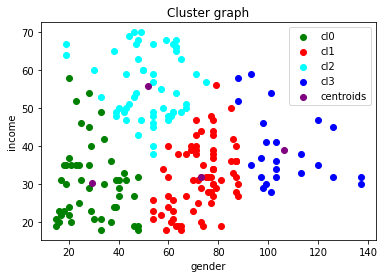

In [38]:
plt.title('Cluster graph')
plt.xlabel('gender')
plt.ylabel('income')
plt.scatter(df0['income'], df0['Age'], color = 'green', label = 'cl0')
plt.scatter(df1['income'], df1['Age'], color = 'red', label = 'cl1')
plt.scatter(df2['income'], df2['Age'], color = 'cyan', label = 'cl2')
plt.scatter(df3['income'], df3['Age'], color = 'blue', label = 'cl3')

plt.scatter(center2[:,0], center2[:,1],color = 'purple', label = 'centroids')
plt.legend()